## Dataset Information
The dataset utilized in this analysis encompasses transaction information from a store on Black Friday, including customer demographic features and transaction details. This analysis aims to achieve two objectives. Firstly, it will involve exploring the data to identify correlations between various elements, providing insights for future marketing strategies. Secondly, regression methods will be employed to predict future purchases.m

The dataset is taken from https://www.kaggle.com/kkartik93/black-friday-sales-prediction.

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

## Import libraries

In [4]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import warnings  # For handling warnings

# Setting matplotlib to display plots inline
%matplotlib inline

# Ignoring warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [5]:
# Reading the dataset from a CSV file into a DataFrame
df = pd.read_csv('train.csv')

# Displaying the first few rows of the DataFrame to understand its structure
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Generating statistical information about the numerical columns in the DataFrame
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# Displaying information about the DataFrame including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# Finding the number of unique values in each column of the DataFrame
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Handling Missing Values

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
#Impute Missing data using median of the column:
def impute_nan(df, variable, median):
    df[variable] = df[variable].fillna(median)
    
#Calculate median:
median = df.Product_Category_2.median()

#Call the function:
impute_nan(df, 'Product_Category_2', median)

In [11]:
#Same for the Product_Category_3 Column:
median = df.Product_Category_3.median()

#Call the function:
impute_nan(df, 'Product_Category_3', median)

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Exploratory Data Analysis

### Distribution of Target Column

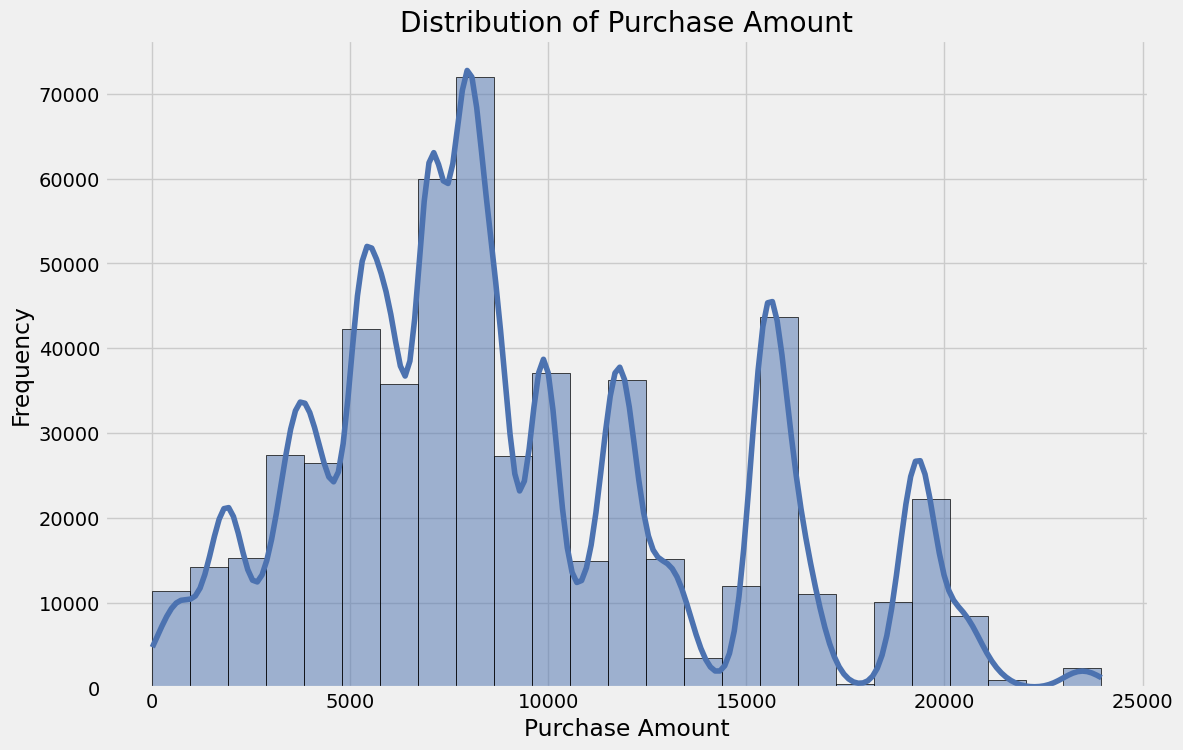

In [13]:
# Setting the plotting style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Creating a figure with a specific size and style
plt.figure(figsize=(12, 8))
sns.set_palette("deep")  # Setting color palette to pastel

# Creating a distribution plot for the 'Purchase' column with enhanced aesthetics
sns.histplot(df['Purchase'], bins=25, kde=True, edgecolor='black')

# Adding title and labels
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

### Purchase Based on Gender

<Axes: xlabel='Gender', ylabel='count'>

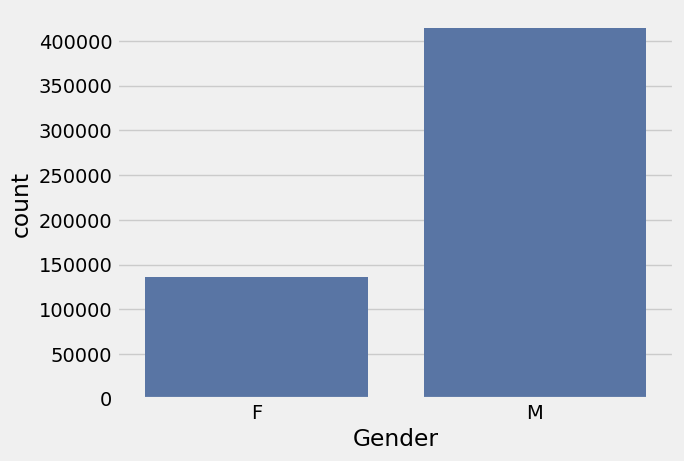

In [14]:
# Creating a count plot for the 'Gender' column
sns.countplot(x='Gender', data=df)

### Purchase Based on Age Group

<Axes: xlabel='Age', ylabel='count'>

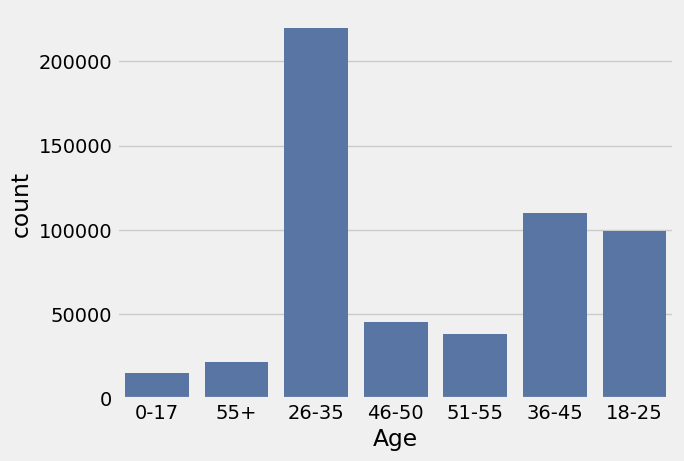

In [15]:
# Creating a count plot for the 'Age' column
sns.countplot(x='Age', data=df)

### Purchase Based on Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

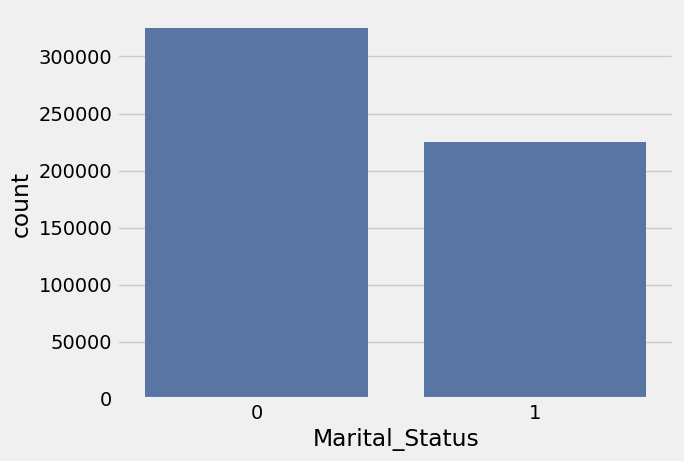

In [16]:
# Creating a count plot for the 'Marital_Status' column
sns.countplot(x='Marital_Status', data=df)

### Purchase Based on Occupation

<Axes: xlabel='Occupation', ylabel='count'>

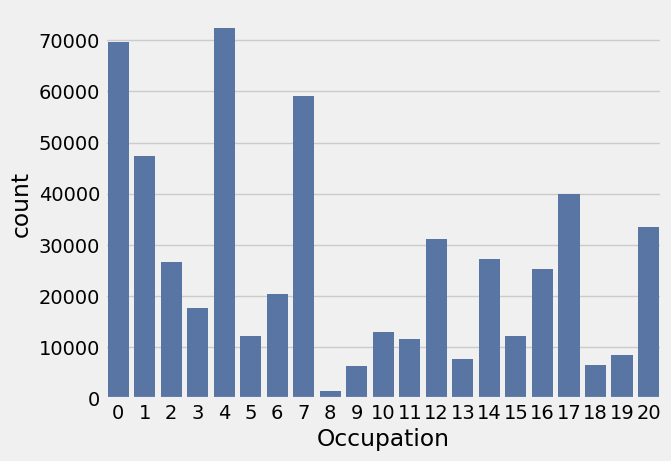

In [17]:
# Creating a count plot for the 'Occupation' column
sns.countplot(x='Occupation', data=df)

### Purchase Based on Product Categories

<Axes: xlabel='Product_Category_1', ylabel='count'>

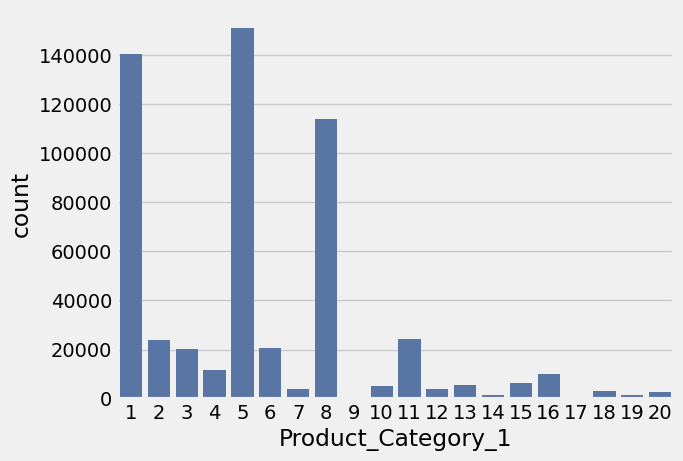

In [18]:
# Creating a count plot for the 'Product_Category_1' column
sns.countplot(x='Product_Category_1', data=df)

<Axes: xlabel='Product_Category_2', ylabel='count'>

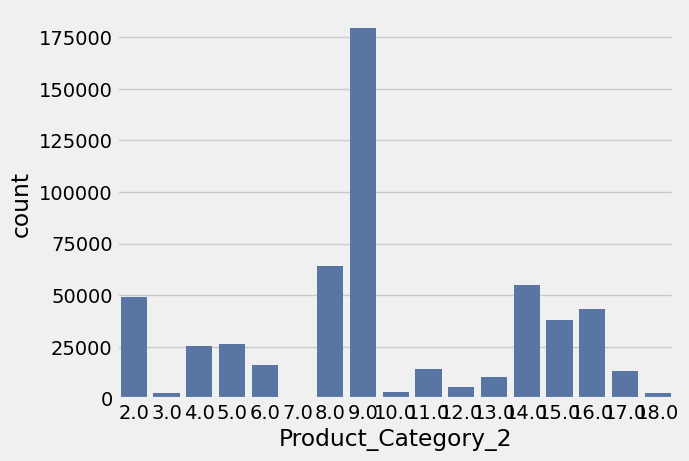

In [19]:
# Creating a count plot for the 'Product_Category_2' column
sns.countplot(x='Product_Category_2', data=df)

<Axes: xlabel='Product_Category_3', ylabel='count'>

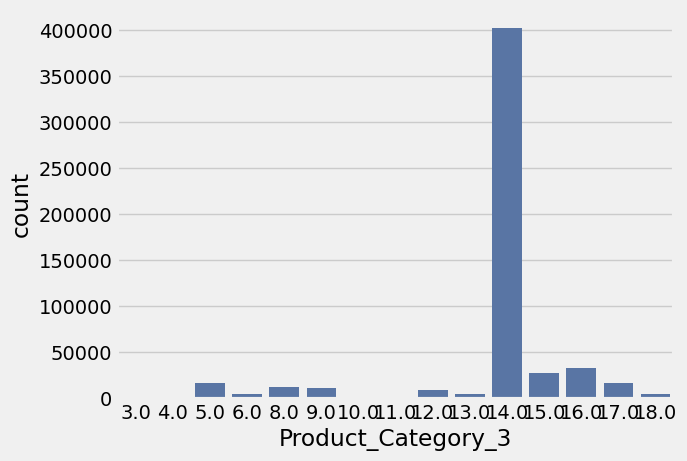

In [20]:
# Creating a count plot for the 'Product_Category_3' column
sns.countplot(x='Product_Category_3', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

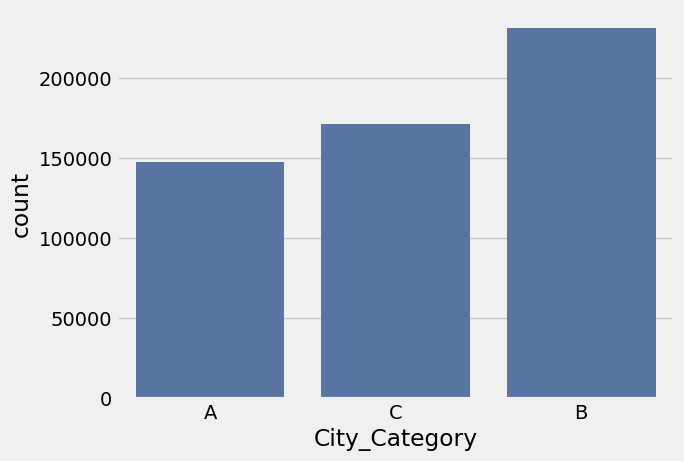

In [21]:
# Creating a count plot for the 'City_Category' column
sns.countplot(x='City_Category', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

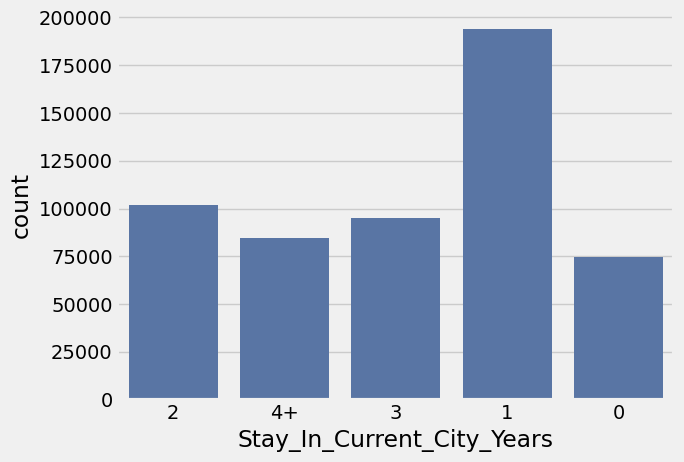

In [22]:
# Creating a count plot for the 'Occupation' column
sns.countplot(x='Stay_In_Current_City_Years', data=df)

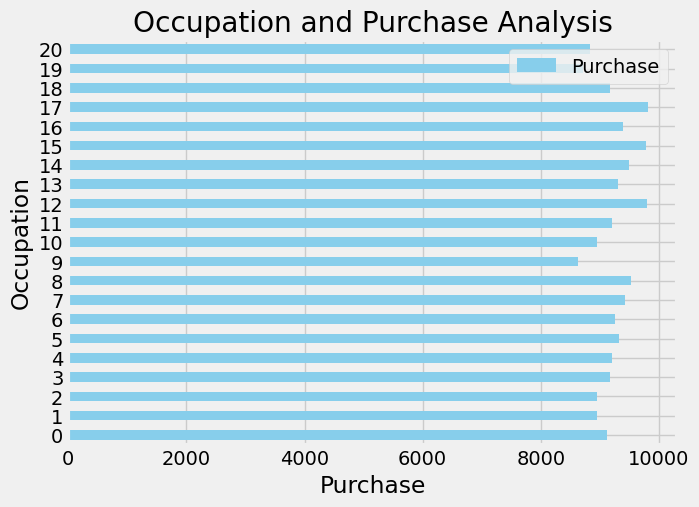

In [23]:
# Creating a horizontal bar plot to visualize the relationship between occupation and purchase amount
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='barh', figsize=(7, 5), color='skyblue')

# Adding labels and title
plt.ylabel('Occupation')
plt.xlabel("Purchase")
plt.title("Occupation and Purchase Analysis")

# Displaying the plot
plt.show()

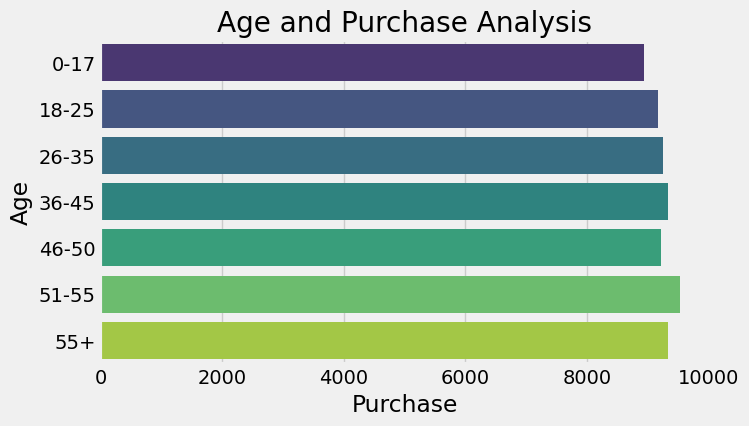

In [24]:
# Creating a bar plot horizontally to visualize the relationship between age and purchase amount
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
plt.figure(figsize=(7, 4))  # Adjusting the figure size
sns.barplot(y=age_plot.index, x=age_plot['Purchase'], palette='viridis')  # Using seaborn for better aesthetics

# Adding labels and title
plt.ylabel('Age')
plt.xlabel("Purchase")
plt.title("Age and Purchase Analysis")

# Displaying the plot
plt.show()

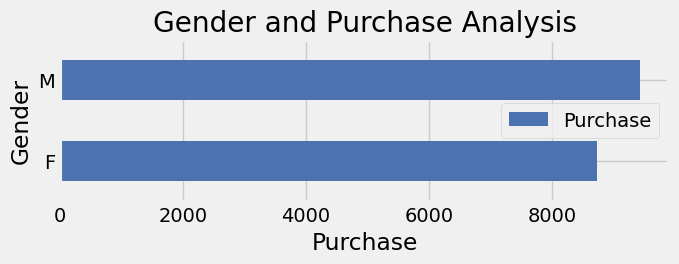

In [25]:
# Creating a bar plot horizontally with different colors for each gender
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='barh', figsize=(7, 2))

# Adding labels and title
plt.ylabel('Gender')
plt.xlabel("Purchase")
plt.title("Gender and Purchase Analysis")

# Displaying the plot
plt.show()

## Handling Categorical Features

In [26]:
# Dictionary for encoding gender values
gender_dict = {'F': 0, 'M': 1}

# Applying the encoding using the dictionary
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])

# Displaying the first few rows of the DataFrame after encoding
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,9.0,14.0,7969


In [27]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Encoding categorical columns using label encoding
for col in cols:
    df[col] = le.fit_transform(df[col])

# Displaying the first few rows of the DataFrame after encoding
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 44.1+ MB


## Coorelation Matrix



In [29]:
pip install --upgrade seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


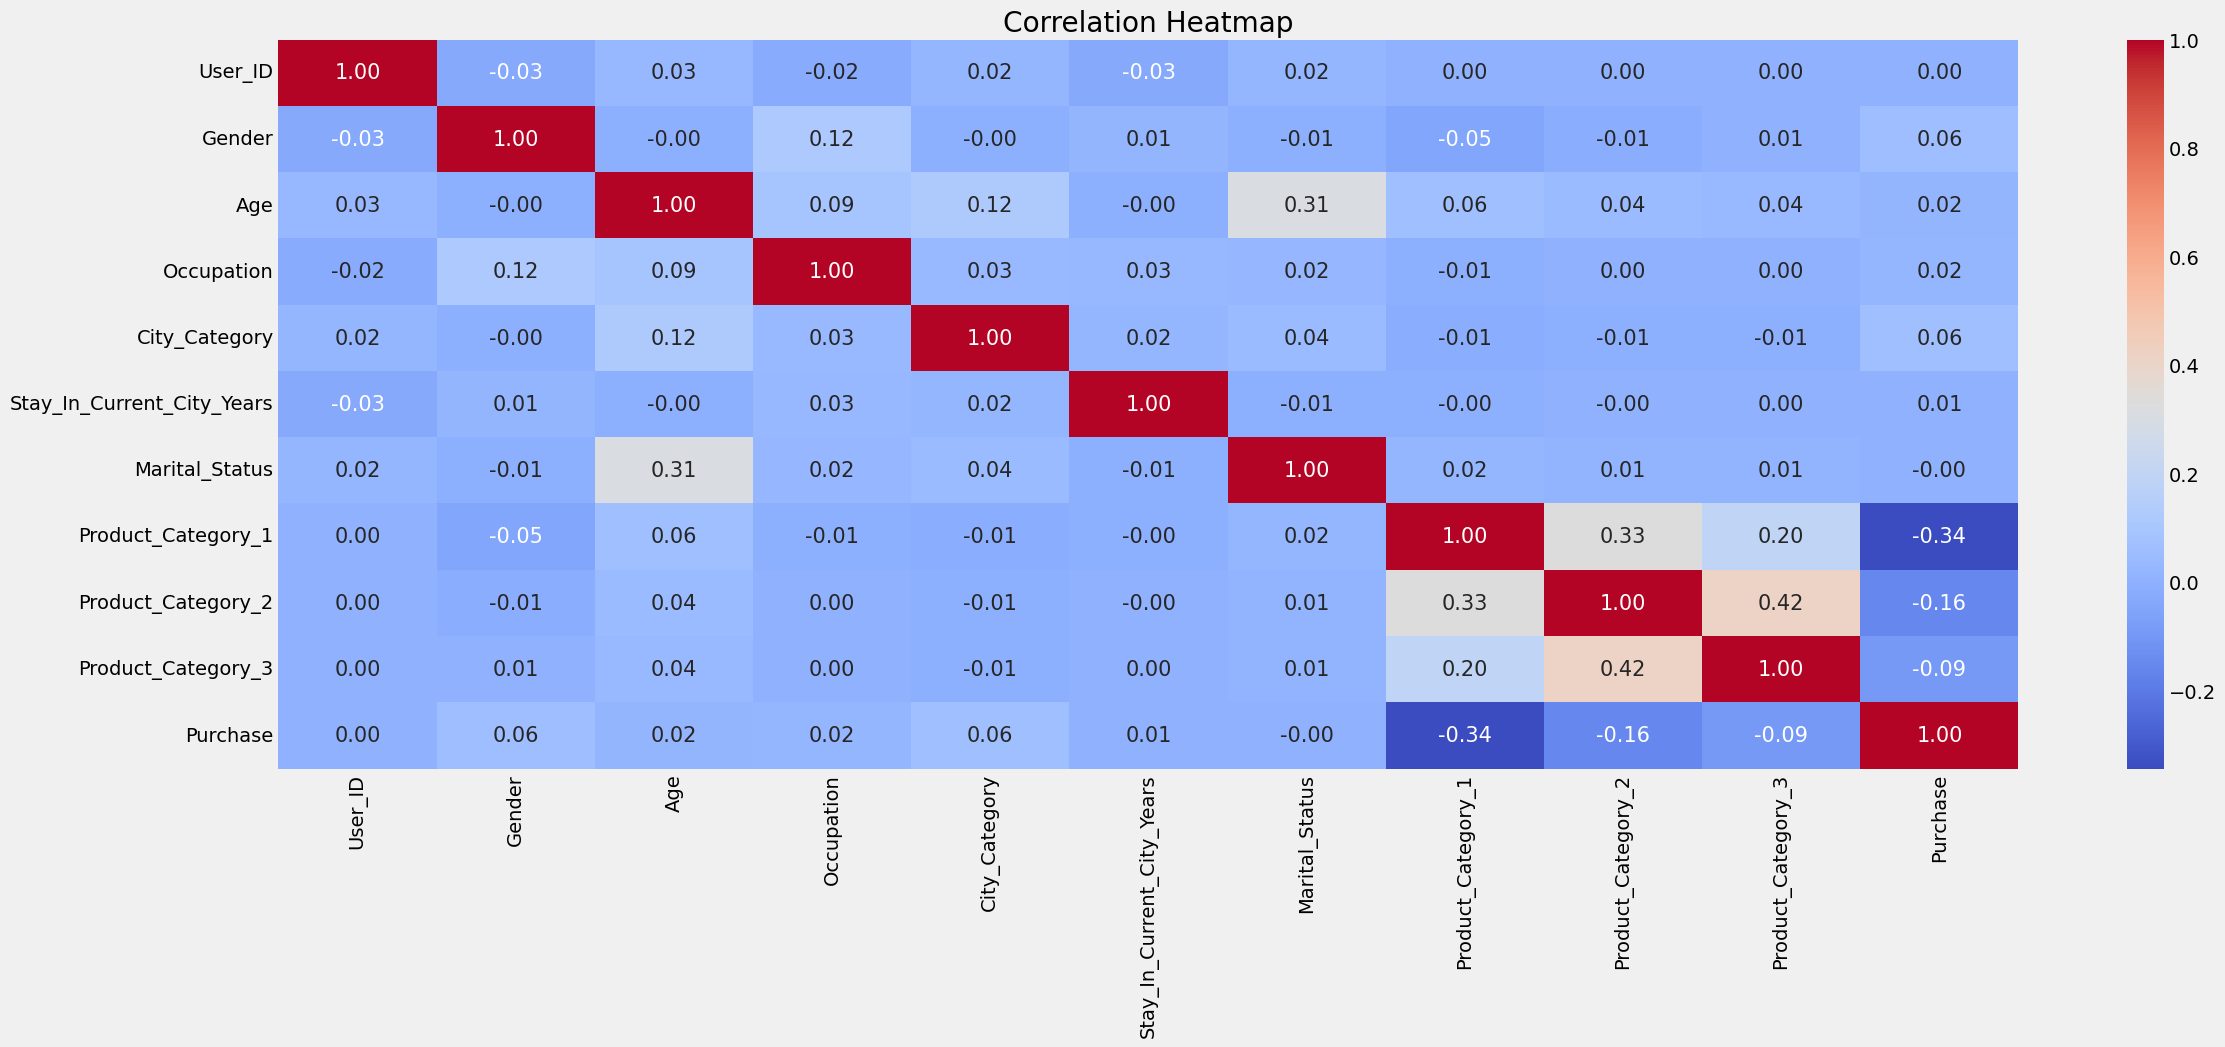

In [30]:
# Dropping the Product_ID column
df_without_product_id = df.drop(columns=['Product_ID'])

# Calculating the correlation matrix
corr = df_without_product_id.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 15})
plt.title('Correlation Heatmap')
plt.show()

## Input Split

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [36]:
# Separating features (X) and target variable (y)
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

## Model Training

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    """
    Trains a machine learning model, evaluates its performance, and computes cross-validation score.

    Parameters:
    model : object
        The machine learning model to be trained.
    X : DataFrame
        The features of the dataset.
    y : Series
        The target variable of the dataset.
    """
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    
    # Fitting the model on the training data
    model.fit(x_train, y_train)
    
    # Predicting the target variable using the trained model
    pred = model.predict(x_test)
    
    # Computing mean squared error (MSE) on the test data
    mse = mean_squared_error(y_test, pred)
    
    # Performing cross-validation to estimate model performance
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    # Printing the results
    print("Results")
    print("MSE:", np.sqrt(mse))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4617.994034201719
CV Score: 4625.252945835687


<Axes: title={'center': 'Model Coefficients'}>

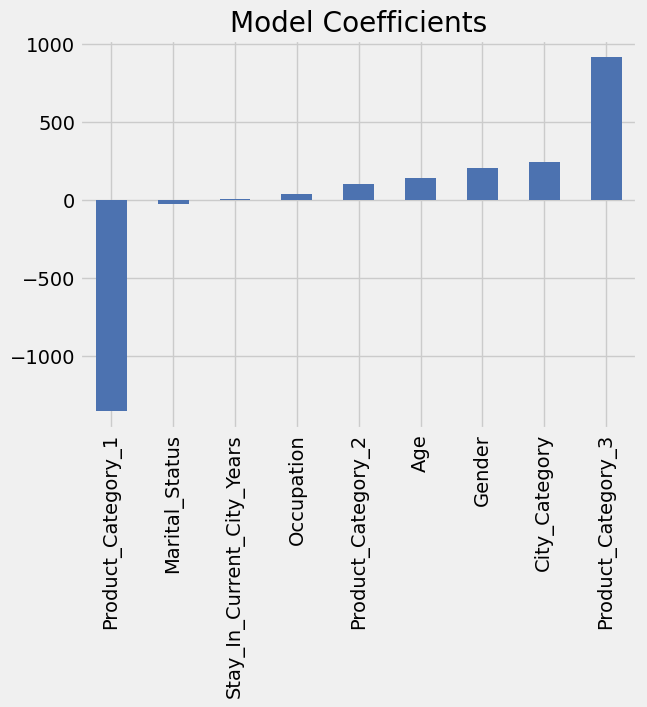

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Creating a pipeline with feature scaling and linear regression
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Training the model and evaluating its performance
train(model, X, y)

# Extracting coefficients of the trained model and sorting them
coef = pd.Series(model.named_steps['linear_regression'].coef_, X.columns).sort_values()

# Visualizing the model coefficients as a bar plot
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3367.6189064001424
CV Score: 3340.5711227941492


<Axes: title={'center': 'Feature Importance'}>

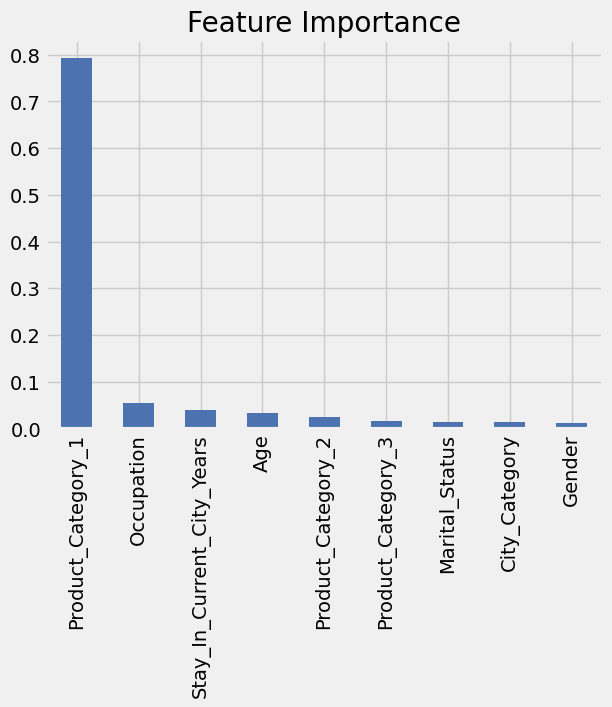

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Creating a Decision Tree Regressor model
model = DecisionTreeRegressor()

# Training the model and evaluating its performance
train(model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3062.6507833998867
CV Score: 3052.3695256650744


<Axes: title={'center': 'Feature Importance'}>

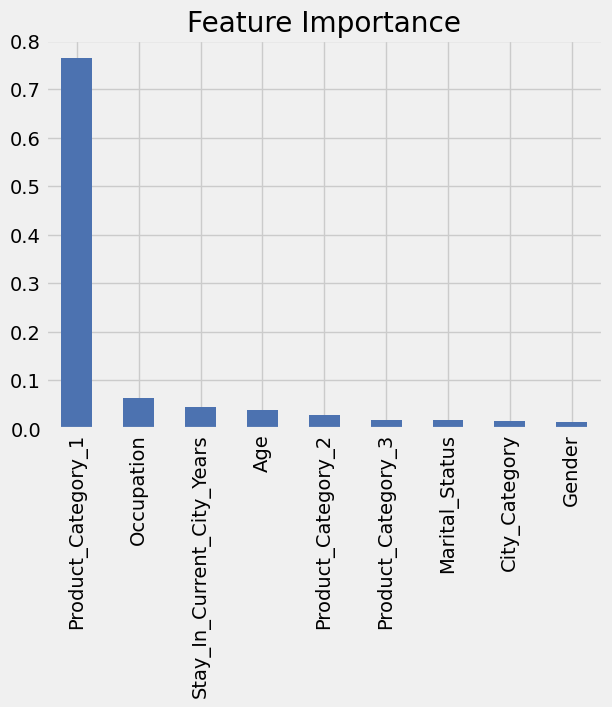

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest Regressor model
model = RandomForestRegressor(n_jobs=-1)

# Training the model and evaluating its performance
train(model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3195.711563019314
CV Score: 3180.694730816978


<Axes: title={'center': 'Feature Importance'}>

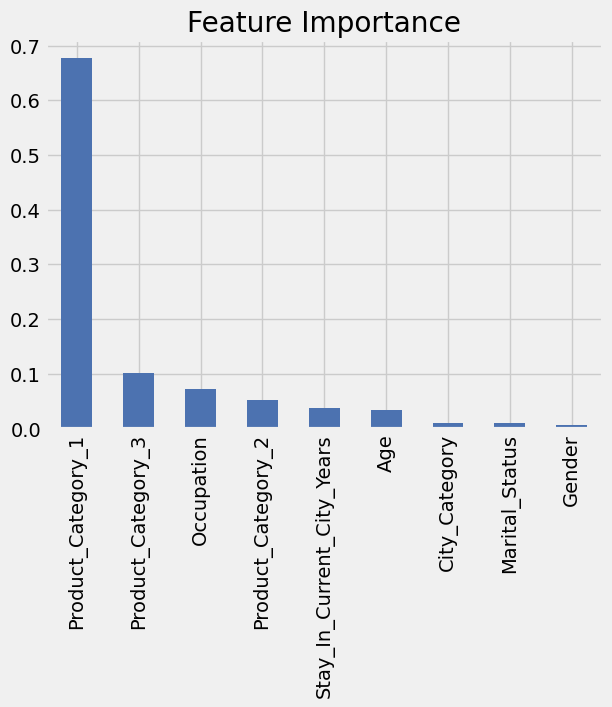

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

# Creating an Extra Trees Regressor model
model = ExtraTreesRegressor(n_jobs=-1)

# Training the model and evaluating its performance
train(model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')